Write a Python program to fit a linear regression through the data of Olympic men's and women's 100m time (see attached file). Find the p-value for each of the coefficients. Also find the 95% confidence interval associated with each coefficient (using t-distribution). Plot the data points along with the best fit line and the lines drawn by taking into account the 95% confidence interval coefficients.

Utilize any Python libraries for the task, such as sklearn.linear_model for performing linear regression and statsmodels.api for calculating p-values.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import t

In [12]:
d =pd.read_csv('Olympic 100 m time.csv')
d

,Year,Olympic men's 100 m time (s),Olympic women's 100 m time (s)
0,1896,12.000,NaN
1,1900,11.000,NaN
2,1904,11.000,NaN
3,1906,11.200,NaN
4,1908,10.800,NaN
5,1912,10.800,NaN
6,1920,10.800,NaN
7,1924,10.600,NaN
8,1928,10.800,12.20
9,1932,10.300,11.90


In [9]:
df_men = d.dropna(subset=["Olympic men's 100 m time (s)"])
df_women = d.dropna(subset=["Olympic women's 100 m time (s)"]) #dropna is used to remove missing values from a DataFrame

In [72]:
X_men = df_men['Year'].values.reshape(-1, 1)   #.reshape(-1, 1) transforms a 1D array into a 2D array with a single column
y_men = df_men["Olympic men's 100 m time (s)"].values  #.values attribute is used to get the underlying data of a DataFrame


In [74]:
reg_men = LinearRegression().fit(X_men, y_men)
y_men_pred = reg_men.predict(X_men)

In [73]:
y_women=df_women["Olympic women\'s 100 m time (s)"]
X_women=df_women['Year'].values.reshape(-1, 1)
model = LinearRegression().fit(X_women, y_women)
y=model.predict(X_women)

In [75]:
X_men_sm = sm.add_constant(X_men) #adds a column of ones to  2D array X_men to include an intercept term in regression model
X_women_sm = sm.add_constant(X_women)

In [76]:
model_men = sm.OLS(y_men, X_men_sm).fit()
model_women = sm.OLS(y_women, X_women_sm).fit()


 find the 95% confidence interval associated with each coefficient (using t-distribution)

In [77]:
conf_int_men = model_men.conf_int(alpha=0.05)
conf_int_women = model_women.conf_int(alpha=0.05)

In [78]:
# Get the slope and intercept
slope_men, intercept_men = reg_men.coef_[0], reg_men.intercept_
slope_women, intercept_women = model.coef_[0], model.intercept_

In [79]:
#stats.t.ppf(1 - alpha / 2, degree of freedom)
# Calculate confidence interval lines
# t_value is the critical value from the t-distribution for a 95% confidence interval with 
# 𝑛−2 degrees of freedom, where n is the number of data points.
t_value = t.ppf(0.975, df_men.shape[0] - 2)
t_value

2.045229642132703

In [80]:
# model_men.bse[1] is the standard error of the slope.
# model_men.bse[0] is the standard error of the intercept. 
# These standard errors measure the variability of the coefficient estimates.
# For the 95% confidence interval of each coefficient:
# Upper Bound: Estimate + (t-value * Standard Error)
# Lower Bound: Estimate - (t-value * Standard Error)

slope_men_upper = slope_men + t_value * model_men.bse[1]
slope_men_lower = slope_men - t_value * model_men.bse[1]
intercept_men_upper = intercept_men + t_value * model_men.bse[0]
intercept_men_lower = intercept_men - t_value * model_men.bse[0]

slope_women_upper = slope_women + t_value * model_women.bse[1]
slope_women_lower = slope_women - t_value * model_women.bse[1]
intercept_women_upper = intercept_women + t_value * model_women.bse[0]
intercept_women_lower = intercept_women - t_value * model_women.bse[0]

C:\Users\raush\AppData\Local\Temp\ipykernel_17952\932507164.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_women_upper = slope_women + t_value * model_women.bse[1]
C:\Users\raush\AppData\Local\Temp\ipykernel_17952\932507164.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_women_lower = slope_women - t_value * model_women.bse[1]
C:\Users\raush\AppData\Local\Temp\ipykernel_17952\932507164.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

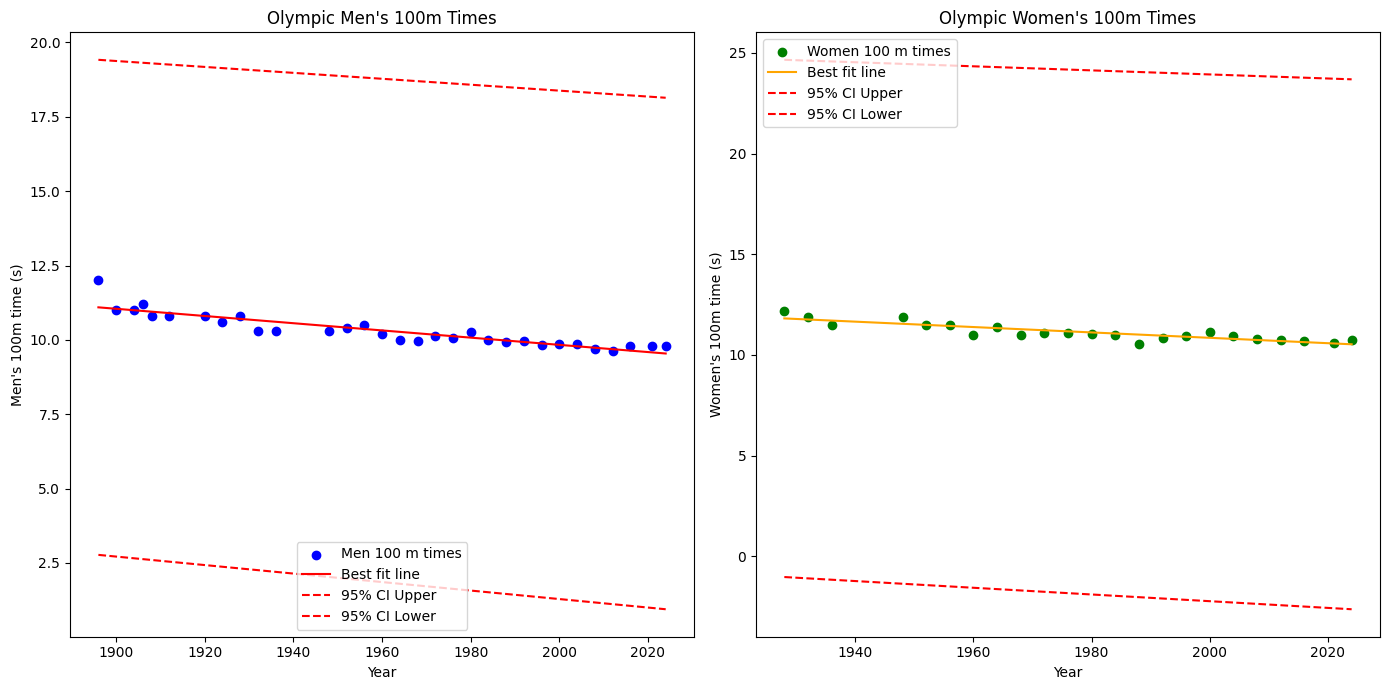

Men's 100m Linear Regression Results
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     132.1
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           2.56e-12
Time:                        04:36:13   Log-Likelihood:                 2.3630
No. Observations:                  31   AIC:                           -0.7259
Df Residuals:                      29   BIC:                             2.142
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         3

In [81]:
# Plotting
plt.figure(figsize=(14, 7))

# Plot men
plt.subplot(1, 2, 1)
plt.scatter(df_men['Year'], df_men["Olympic men's 100 m time (s)"], color='blue', label="Men 100 m times")
plt.plot(df_men['Year'], y_men_pred, color='red', label='Best fit line')
plt.plot(df_men['Year'], intercept_men_upper + slope_men_upper * df_men['Year'], 'r--', label='95% CI Upper')
plt.plot(df_men['Year'], intercept_men_lower + slope_men_lower * df_men['Year'], 'r--', label='95% CI Lower')
plt.xlabel('Year')
plt.ylabel("Men's 100m time (s)")
plt.title("Olympic Men's 100m Times")
plt.legend()

# Plot women
plt.subplot(1, 2, 2)
plt.scatter(df_women['Year'], df_women["Olympic women's 100 m time (s)"], color='green', label="Women 100 m times")
plt.plot(df_women['Year'], y, color='orange', label='Best fit line')
plt.plot(df_women['Year'], intercept_women_upper + slope_women_upper * df_women['Year'], 'r--', label='95% CI Upper')
plt.plot(df_women['Year'], intercept_women_lower + slope_women_lower * df_women['Year'], 'r--', label='95% CI Lower')
plt.xlabel('Year')
plt.ylabel("Women's 100m time (s)")
plt.title("Olympic Women's 100m Times")
plt.legend()

plt.tight_layout()
plt.show()

# Print results
print("Men's 100m Linear Regression Results")
print(model_men.summary())

print("\nWomen's 100m Linear Regression Results")
print(model_women.summary())